In [1]:
"""
Import packages
"""
import uproot
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import math

from scipy.ndimage.filters import gaussian_filter1d

/tmp/ipykernel_7736/1729742563.py:10: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [2]:
print("Your uproot version: ", uproot.__version__)
print("Info: uproot 4+ is recommended.")

Your uproot version:  5.0.10
Info: uproot 4+ is recommended.


/tmp/ipykernel_7736/61248580.py:31: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


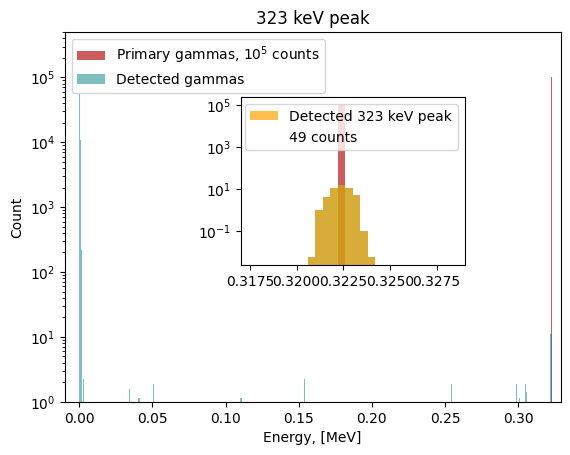

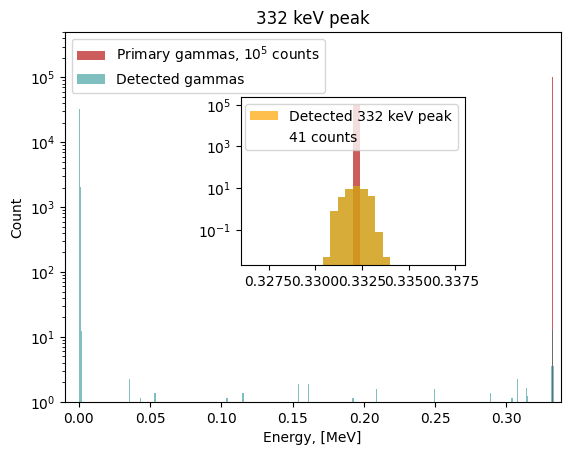

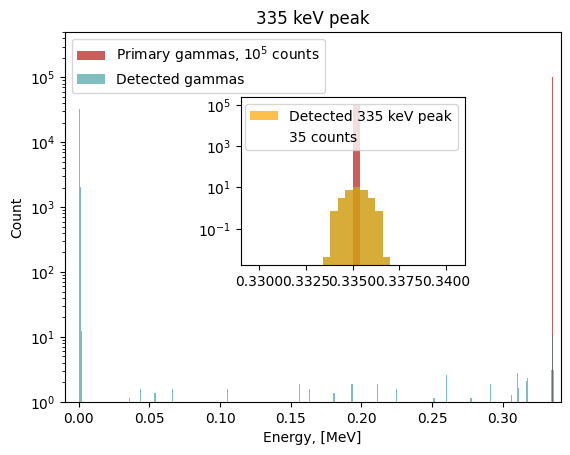

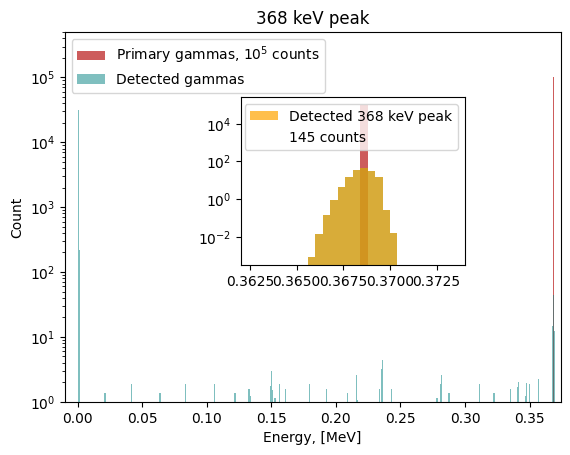

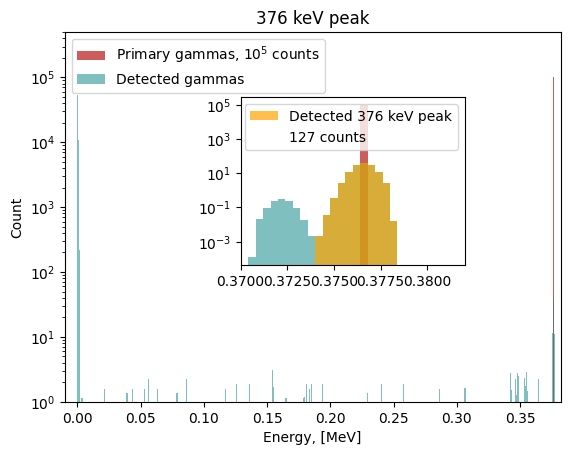

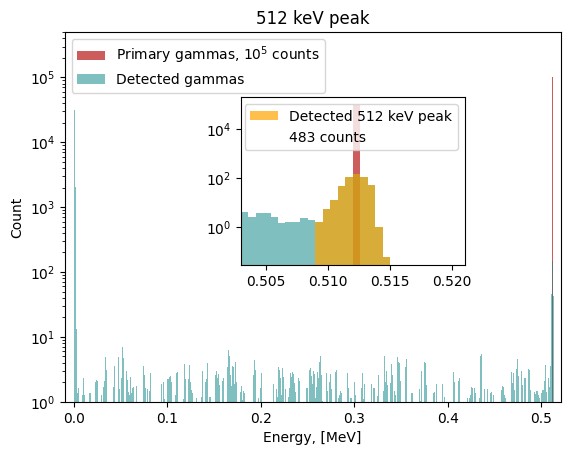

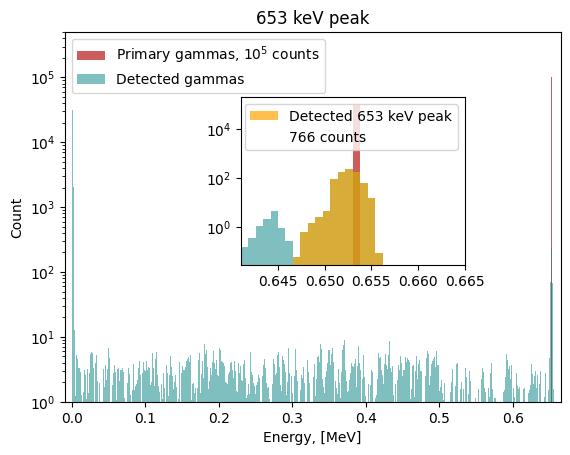

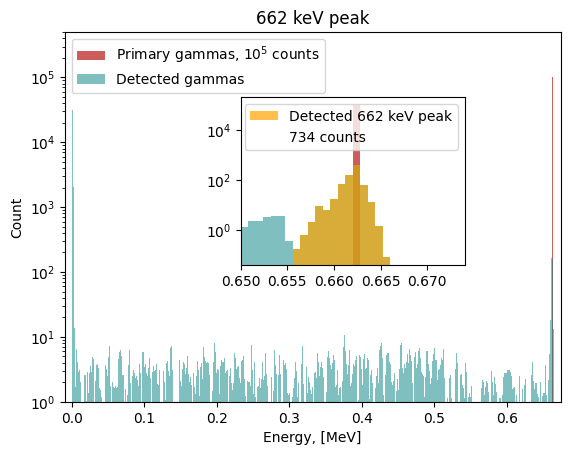

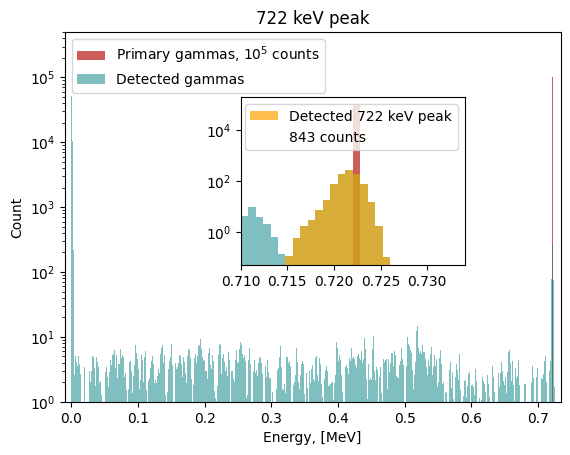

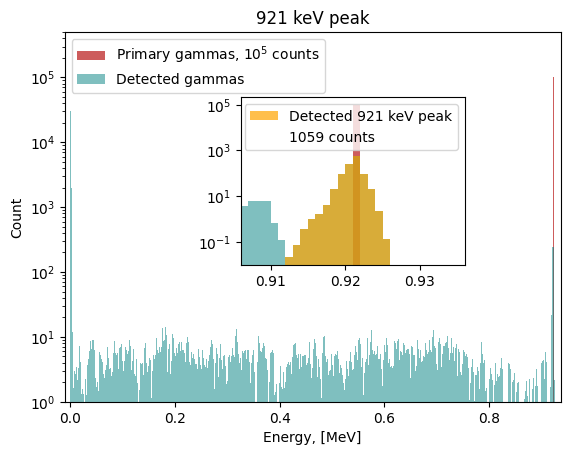

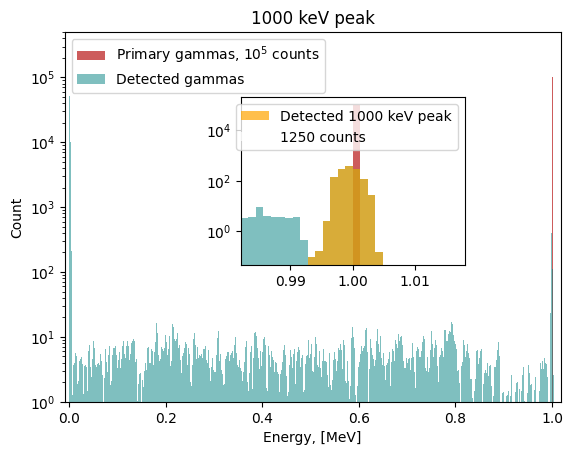

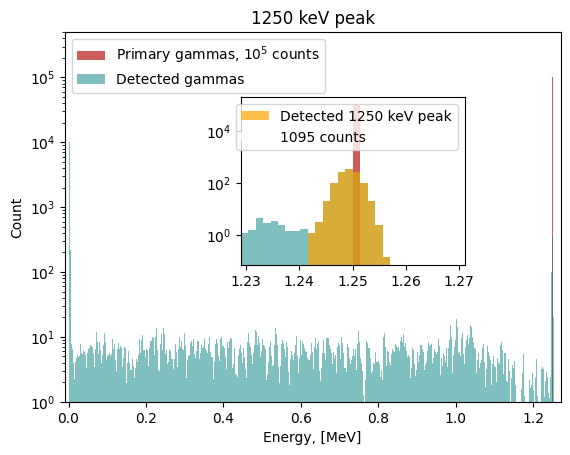

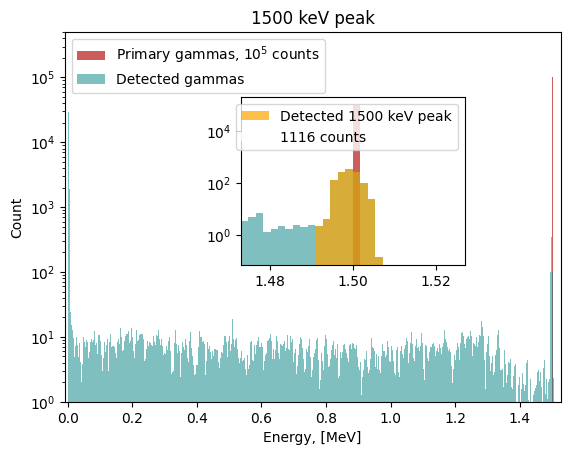

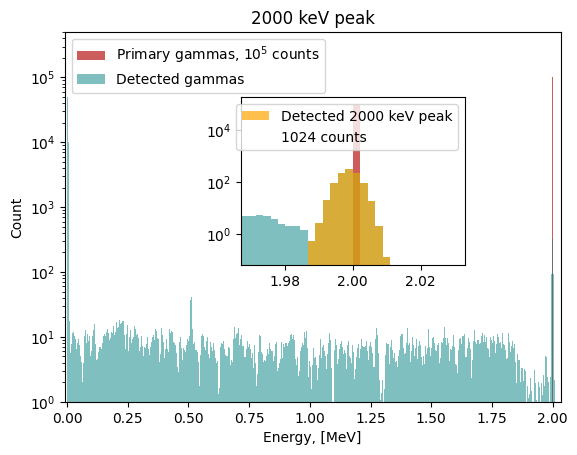

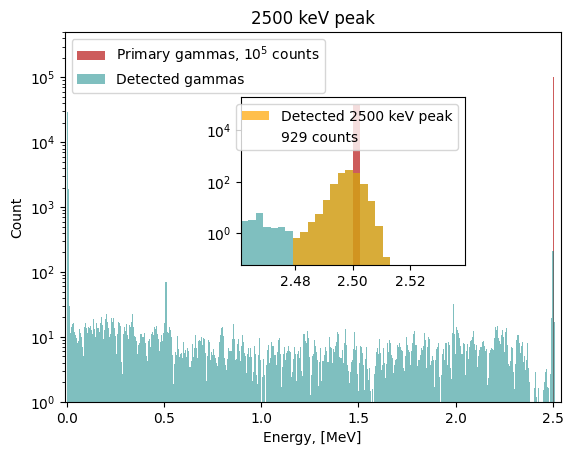

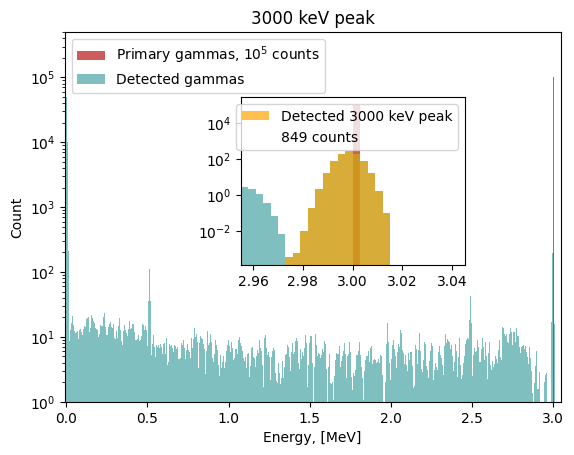

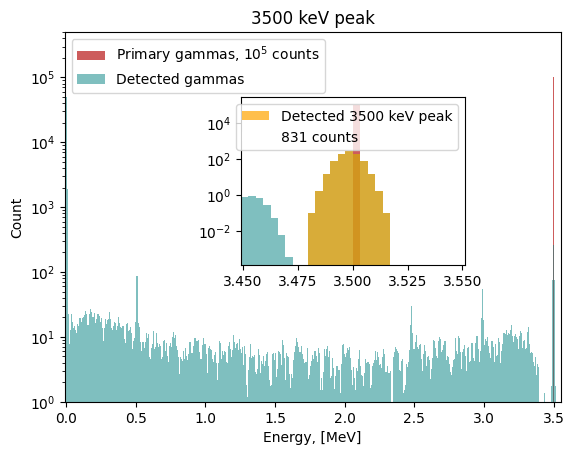

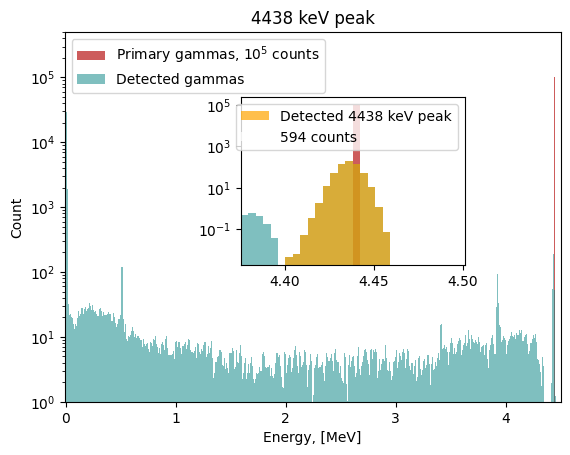

In [3]:
nbins_nested=30

peak_energy=[323,332,335,368,376,512,653,662,722,921,1000,1250,1500,2000,2500,3000,3500,4438]
peak_energy_true=[322.52,332.35,335.37,368.65,376.65,512.5,653.02,662.4,722.01,921.5,1000,1250,1500,2000,2500,3000,3500,4438]
start_bin_center_value = [323-0.8*nbins_nested/10,332-0.5*nbins_nested/10,335-0.5*nbins_nested/10,368-nbins_nested/10,376-0.7*nbins_nested/10,512-1.1*nbins_nested/10,653-2.2*nbins_nested/10,662-2.1*nbins_nested/10,722-2.5*nbins_nested/10,921-2.8*nbins_nested/10,1000-2.5*nbins_nested/10,1250-3*nbins_nested/10,1500-3.1*nbins_nested/10,2000-5*nbins_nested/10,2500-7*nbins_nested/10,3000-9*nbins_nested/10,3500-9*nbins_nested/10,4438-14*nbins_nested/10]
end_bin_center_value = [323+0.8*nbins_nested/10,332+nbins_nested/10,335+nbins_nested/10,368+nbins_nested/10,376+nbins_nested/10,512+nbins_nested/10,653+nbins_nested/10,662+1.5*nbins_nested/10,722+1.5*nbins_nested/10,921+2*nbins_nested/10,1000+2*nbins_nested/10,1250+3*nbins_nested/10,1500+3*nbins_nested/10,2000+6*nbins_nested/10,2500+7*nbins_nested/10,3000+8*nbins_nested/10,3500+9*nbins_nested/10,4438+12*nbins_nested/10]
xlims_low= [0.323-2*nbins_nested/10000,0.332-2*nbins_nested/10000,0.335-2*nbins_nested/10000,0.368-2*nbins_nested/10000,0.376-2*nbins_nested/10000,0.512-3*nbins_nested/10000,0.653-4*nbins_nested/10000,0.662-4*nbins_nested/10000,0.722-4*nbins_nested/10000,0.921-5*nbins_nested/10000,1-6*nbins_nested/10000,1.25-7*nbins_nested/10000,1.5-9*nbins_nested/10000,2-11*nbins_nested/10000,2.5-13*nbins_nested/10000,3-15*nbins_nested/10000,3.5-17*nbins_nested/10000,4.438-21*nbins_nested/10000]
xlims_high = [0.323+2*nbins_nested/10000,0.332+2*nbins_nested/10000,0.335+2*nbins_nested/10000,0.368+2*nbins_nested/10000,0.376+2*nbins_nested/10000,0.512+3*nbins_nested/10000,0.653+4*nbins_nested/10000,0.662+4*nbins_nested/10000,0.722+4*nbins_nested/10000,0.921+5*nbins_nested/10000,1+6*nbins_nested/10000,1.25+7*nbins_nested/10000,1.5+9*nbins_nested/10000,2+11*nbins_nested/10000,2.5+13*nbins_nested/10000,3+15*nbins_nested/10000,3.5+17*nbins_nested/10000,4.438+21*nbins_nested/10000]
efficiency=[]
efficiency_err=[]

#read the simulation data and plot the primary and gaussian-smoothed detected gamma spectrum in the peak region
for p in peak_energy:
    #give path to simulation output .root file
    f = uproot.open('/home/mfedkevych/Work/LZ/code_backup/Analysis/AmBe_efficiency_on_endcap_withW_far/simulation_output/AmBe{}keV_WithOuterW_endcap_far.root'.format(p))
    t = f['tT1']
    rq = t.arrays(library='np')
    TrueEnergy = rq['TrueEnergy']
    GenEnergy = rq['GenEnergy']

    bins_num=1000
    
    i=peak_energy.index(p)

    start_bin_center = start_bin_center_value[i]/1000
    end_bin_center = end_bin_center_value[i]/1000


    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.ndimage.filters import gaussian_filter1d

    plt.title("{} keV peak".format(p))
    
    # Create the histogram
    bin_counts, bin_edges, _ = plt.hist(TrueEnergy, bins=bins_num, edgecolor='blue', alpha=0)

    # Calculate the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Calculate the bin width
    bin_width = bin_edges[1] - bin_edges[0]

    # Extend the original histogram with empty bins on the right
    num_extra_bins = 100  # You can adjust the number of empty bins here
    extended_bin_edges = np.linspace(bin_edges[-1], bin_edges[-1] + (num_extra_bins + 1) * bin_width, num=num_extra_bins + 1)
    extended_bin_centers = (extended_bin_edges[:-1] + extended_bin_edges[1:]) / 2
    extended_bin_counts = np.zeros(num_extra_bins)

    # Concatenate the original and extended histogram
    full_bin_centers = np.concatenate((bin_centers, extended_bin_centers))
    full_bin_counts = np.concatenate((bin_counts, extended_bin_counts))

    # Initialize an array for smoothed counts
    smoothed_counts = np.zeros_like(full_bin_counts)

    # Iterate over bin centers and apply Gaussian smoothing to the extended histogram
    p0 = 1.262
    p1 = 0.0003995

    for j, center in enumerate(full_bin_centers):
        sigma = center * p1 + p0
        smoothed_counts[j] = gaussian_filter1d(full_bin_counts, sigma)[j]


    # Your existing code for the main histogram
    plt.hist(GenEnergy, bins=500, range=(0.0, xlims_high[i]), color='indianred', label=r'Primary gammas, $10^5$ counts')
    plt.hist(full_bin_centers, bins=np.concatenate((bin_edges, extended_bin_edges)), range=(0.0, xlims_high[i]), weights=smoothed_counts, edgecolor=None, color='teal', alpha=0.5)

    plt.xlabel('Energy, [MeV]')
    plt.ylabel('Count')
    plt.xlim(-0.01, xlims_high[i])
    plt.ylim(1, 5e5)

    plt.yscale('log')

    # Create custom legend entries with desired colors
    legend_entries = [
        plt.Rectangle((0, 0), 1, 1, fc='indianred'),
        plt.Rectangle((0, 0), 1, 1, fc='teal', alpha=0.5)
    ]
    legend_labels = [r'Primary gammas, $10^5$ counts', 'Detected gammas']

    # Set the legend with custom legend entries
    plt.legend(legend_entries, legend_labels, loc='upper left')

    # Calculate the position for the arrows in the main plot
    arrow_x1 = start_bin_center
    arrow_x2 = end_bin_center



    # Create a nested plot on the left side under the legend
    ax2 = plt.axes([0.4, 0.395, 0.35, 0.35])  # [left, bottom, width, height]

    # Find the indices of bins within the specified range
    indices_in_range = np.where((full_bin_centers >= start_bin_center) & (full_bin_centers <= end_bin_center))




    # Extract the counts within the specified range
    counts_in_range = smoothed_counts[indices_in_range]

    # Calculate the sum of counts in the last plotted histogram
    sum_counts_peak = np.sum(counts_in_range)



    

    # Plot the zoomed-in histograms with custom legend entries
    ax2.hist(GenEnergy, bins=nbins_nested, 
             range=(xlims_low[i], xlims_high[i]), color='indianred')
    ax2.hist(full_bin_centers, bins=nbins_nested, weights=smoothed_counts, 
             range=(xlims_low[i], xlims_high[i]), color='teal', alpha=0.5)
    ax2.hist(full_bin_centers[indices_in_range], bins=nbins_nested, weights=smoothed_counts[indices_in_range], 
             range=(xlims_low[i], xlims_high[i]), color='orange', alpha=0.7)  # Plot the specified range in orange

    ax2.set_yscale('log')
    ax2.set_xlim(xlims_low[i], xlims_high[i])


    # Create custom legend entries with desired colors
    legend_entries = [
        plt.Rectangle((0, 0), 1, 1, fc='orange', alpha=0.7), plt.Rectangle((0, 0), 1, 1, fc='white', alpha=0.7)
    ]
    legend_labels = ['Detected {} keV peak'.format(p), '{} counts'.format(math.ceil(sum_counts_peak)) ]

    # Set the legend with custom legend entries
    ax2.legend(legend_entries, legend_labels)

    plt.savefig("Detected_energy_AmBe_{}keV_endcap_vs_primary.png".format(p), bbox_inches='tight')
    plt.show()
    
    efficiency.append(sum_counts_peak/rq['GenEnergy'].shape[0])
    efficiency_err.append(np.sqrt(sum_counts_peak)/rq['GenEnergy'].shape[0])

<ValueView p0=-42895.064692128864 p1=14959.539521720551 p2=442.2864434119504 p3=-534.8558399278988 p4=9.782140237187985 p5=-0.09736543593285135 p6=0.00039050152708690713 p7=0.0>
<ErrorView p0=0.11125850917801632 p1=0.019993225990747467 p2=0.0035155022640387125 p3=0.0006067282720119594 p4=1.7275110108101564e-05 p5=4.623807870445334e-07 p6=7.1523703491540505e-09 p7=0.1>
(-42895.064692128864, 14959.539521720551, 442.2864434119504, -534.8558399278988, 9.782140237187985, -0.09736543593285135, 0.00039050152708690713, 0.0)
<ValueView p0=-31173.515760855033 p1=12243.688853521127 p2=178.99104950611058 p3=-488.4191603784854 p4=12.196756009813983 p5=-0.1825137339323554 p6=0.0014679682008747912 p7=-4.897071431872409e-06>
<ErrorView p0=0.10645128087879667 p1=0.01912159637565825 p2=0.0033685636707065855 p3=0.0005827880590295094 p4=1.657758672708633e-05 p5=4.473668127252234e-07 p6=1.1422783627746562e-08 p7=1.5870049527446113e-10>


/tmp/ipykernel_7736/387981827.py:289: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


<Figure size 2000x1400 with 0 Axes>

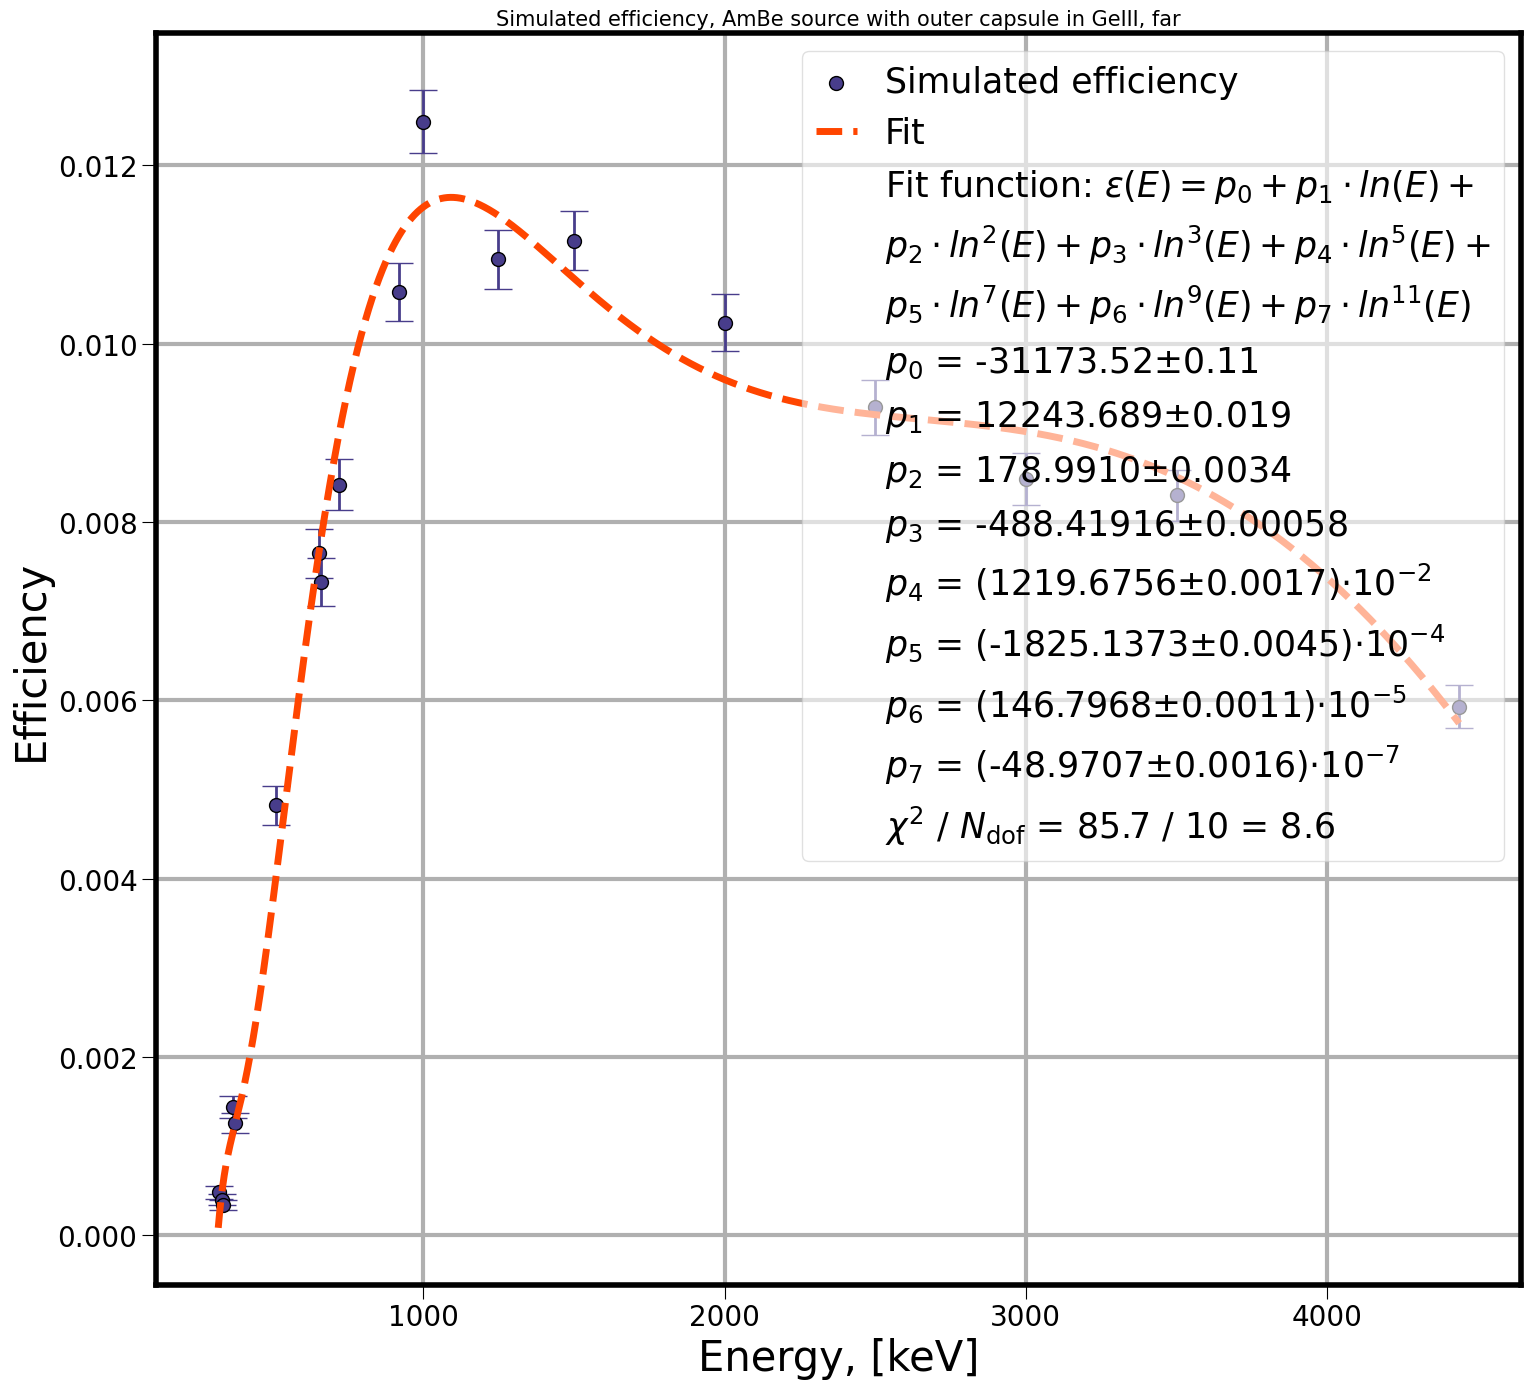

In [4]:
#plot and fit the efficiency curve

import matplotlib

#define variables for the order of plotting
analysis_extra_kwargs = {"zorder":200}
analysis_kwargs = {"zorder":100}
level_kwargs = {"zorder":80}
data_kwargs = {"zorder":50}
error_kwargs = {"zorder":25}
grid_kwargs = {"zorder":0}

#plotting parameters
label_size = 14
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.rcParams['figure.figsize'] = (20.0, 14.0)
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['grid.linewidth'] = 3
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

plt.rcParams['legend.handlelength'] = 1.17
plt.rcParams['legend.handleheight'] = 0.65


#define fit function for average pulse
from scipy.integrate import quad
from decimal import Decimal

from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerLine2D

import iminuit


import scipy
from scipy.signal import find_peaks, peak_widths,hilbert
    
# allow complete fit output information  to be displayed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares




#function to count number of significant digits after comma
def number_sigdigs(x):
    digs_after_comma = str(x - math.floor(x))
    digs_after_comma = digs_after_comma[2:]
    number=0
    for c in digs_after_comma:
        if c=='0':
            number+=1
        else:
            number+=2
            break
    return number





# Define function and its inverse
f = lambda x: (x-p0)/p1
g = lambda x: p1*x+p0

plt.figure()
fig, ax1 = plt.subplots()

plt.title('Simulated efficiency, AmBe source with outer capsule in GeIII, far', fontsize=15)




#label the axes
ax1.set_xlabel( "Energy, [keV]", fontsize=30)
ax1.set_ylabel( u"Efficiency", fontsize=30)

#set axes tick parameters
for tl in ax1.get_xticklabels():
    tl.set_color('black')
    tl.set_size(20)
    


for tl in ax1.get_yticklabels():
    tl.set_color('black')
    tl.set_size(20)
    

    
ax1.tick_params(length=10)

fig.tight_layout()







handlelist=[]
labellist=[]


#Data, = ax1.plot(peak_energy_true, efficiency, 
 #                         color="darkslateblue", label="Simulated efficiency",  **error_kwargs)

data_err = plt.errorbar(peak_energy_true, efficiency, yerr=np.array(efficiency_err), fmt='o', mec='black', 
                            mew=1, color = 'darkslateblue', markersize=1, elinewidth=2, capthick=10, capsize=10, **error_kwargs)

data = ax1.scatter(peak_energy_true, efficiency, label=r'Simulated efficiency', edgecolors='black', 
                              marker="o", color="darkslateblue", s=100, **analysis_kwargs)


handlelist.append(data)
labellist.append(data.get_label())







#define fit function
def efficiency_curve(E, p0,p1,p2,p3,p4,p5,p6,p7):
    return np.reciprocal(E)*(p0 + p1 * np.log(E) + p2 * np.log(E)**2 + p3 * np.log(E)**3 +p4 * np.log(E)**5 + p5 * np.log(E)**7 + p6 * np.log(E)**9 + p7 * np.log(E)**11)





#perform a least squares fit with iminuit
least_squares = LeastSquares(peak_energy_true, efficiency, efficiency_err, efficiency_curve)





#set initial parameter values
p0_00=1
p1_00=1
p2_00=1
p3_00=1
p4_00=1
p5_00=1
p6_00=1
p7_00=0

#assemble list fit arguments for the minimizer
namelist = ['p0', 'p1', 'p2','p3','p4','p5','p6','p7']
kwargs = dict(p0=p0_00, p1=p1_00, p2=p2_00, p3=p3_00, p4=p4_00, p5=p5_00, p6=p6_00, p7=p7_00)


#create iminuit minimizer
minuit = iminuit.Minuit(least_squares, **kwargs, name=namelist ) 
    
    
#set parameter limits
#minuit.limits["bkg"] = (-2e-2,0)
minuit.fixed["p7"] = True


#run minimization  
minuit.migrad()
#minuit.minos()# run uncertainty estimator
#minuit.hesse()# run uncertainty estimator

#print fit results
print(minuit.values)
print(minuit.errors)
# see iminuit tutorial on how to give initial value/range/error

#create tuple of fit parameter result values, to pass to the fit function
argtuple=tuple(minuit.values)
#argtuple=tuple(minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset'])

print(argtuple)



# Update initial parameter values with the fitted values for the second fit
kwargs = dict(p0=minuit.values['p0'], p1=minuit.values['p1'], p2=minuit.values['p2'],
              p3=minuit.values['p3'], p4=minuit.values['p4'], p5=minuit.values['p5'],
              p6=minuit.values['p6'], p7=minuit.values['p7'])

# Create a new Minuit object with the updated initial parameter values
minuit = iminuit.Minuit(least_squares, **kwargs, name=namelist)

# Re-run the minimization with the new Minuit object
minuit.migrad()

# Print fit results for the second fit
print(minuit.values)
print(minuit.errors)

# Create tuple of fit parameter result values for the second fit
argtuple = tuple(minuit.values)




#plot the fit curve
fit=[]
en = []
enmin=320
enmax=peak_energy_true[len(peak_energy_true)-1]

# Replace the while loop with np.linspace
en = np.linspace(enmin, enmax, num=4389)

# Replace the fit calculation with a direct call to efficiency_curve
fit = efficiency_curve(en, minuit.values['p0'], minuit.values['p1'], minuit.values['p2'], minuit.values['p3'], minuit.values['p4'], minuit.values['p5'], minuit.values['p6'], minuit.values['p7'])




Fit, = plt.plot(en, fit, c='orangered', 
                           linewidth=5, linestyle='dashed', label = 'Fit', **analysis_extra_kwargs)


handlelist.append(Fit)
labellist.append(Fit.get_label())
    
text10= 'Fit function: ' + r'$\varepsilon (E) = p_0 + p_1 \cdot ln(E) + p_2 \cdot ln^2(E) + p_3 \cdot ln^3(E) + p_4 \cdot ln^5(E) + p_5 \cdot ln^7(E) + p_6 \cdot ln^9(E) + p_7 \cdot ln^11(E)$'


text_chi_1 = f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(efficiency) - minuit.nfit} = {minuit.fval / (len(efficiency) - minuit.nfit) :.1f}"


extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)

#short legend
leg = plt.legend(handles=[data, Fit, extra, extra], 
                 labels = [data.get_label(), Fit.get_label(), text10, text_chi_1],
                 prop={'size': 30}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)




extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)

text=[r'Fit function: ' + r'$\varepsilon(E) = p_0 + p_1 \cdot ln(E) + $',
      '$p_2 \cdot ln^2(E) + p_3 \cdot ln^3(E) + p_4 \cdot ln^5(E) + $',
      '$p_5 \cdot ln^7(E) + p_6 \cdot ln^9(E) + p_7 \cdot ln^{11}(E)$',
      r'$p_0$'+' = {}$\pm${}'.format(round(Decimal(minuit.values['p0']),number_sigdigs(minuit.errors['p0'])), 
                                        round(Decimal(minuit.errors['p0']),number_sigdigs(minuit.errors['p0']))),
      r'$p_1$'+' = {}$\pm${}'.format(round(Decimal(minuit.values['p1']),number_sigdigs(minuit.errors['p1'])), 
                                        round(Decimal(minuit.errors['p1']),number_sigdigs(minuit.errors['p1']))),
      r'$p_2$'+' = {}$\pm${}'.format(round(Decimal(minuit.values['p2']),number_sigdigs(minuit.errors['p2'])), 
                                        round(Decimal(minuit.errors['p2']),number_sigdigs(minuit.errors['p2']))),
      r'$p_3$'+' = {}$\pm${}'.format(round(Decimal(minuit.values['p3']),number_sigdigs(minuit.errors['p3'])), 
                                        round(Decimal(minuit.errors['p3']),number_sigdigs(minuit.errors['p3']))),
      r'$p_4$'+' = ({}$\pm${})'.format(round(Decimal(minuit.values['p4']*1e2),number_sigdigs(minuit.errors['p4']*1e2)), 
                                        round(Decimal(minuit.errors['p4']*1e2),number_sigdigs(minuit.errors['p4']*1e2))) + '$\cdot 10^{-2}$',
      r'$p_5$'+' = ({}$\pm${})'.format(round(Decimal(minuit.values['p5']*1e4),number_sigdigs(minuit.errors['p5']*1e4)), 
                                        round(Decimal(minuit.errors['p5']*1e4),number_sigdigs(minuit.errors['p5']*1e4))) + '$\cdot 10^{-4}$',
      r'$p_6$'+' = ({}$\pm${})'.format(round(Decimal(minuit.values['p6']*1e5),number_sigdigs(minuit.errors['p6']*1e5)), 
                                        round(Decimal(minuit.errors['p6']*1e5),number_sigdigs(minuit.errors['p6']*1e5))) + '$\cdot 10^{-5}$',
      r'$p_7$'+' = ({}$\pm${})'.format(round(Decimal(minuit.values['p7']*1e7),number_sigdigs(minuit.errors['p7']*1e7)), 
                                        round(Decimal(minuit.errors['p7']*1e7),number_sigdigs(minuit.errors['p7']*1e7))) + '$\cdot 10^{-7}$',
      f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(efficiency) - minuit.nfit} = {minuit.fval / (len(efficiency) - minuit.nfit) :.1f}"
     ]



for string in text:
    handlelist.append(extra)
    labellist.append(string)



fig.tight_layout()


ax1.grid() # add grid to the plot

#short legend
leg = plt.legend(handles=handlelist, 
                 labels = labellist,
                 prop={'size': 25}, loc = 'upper right', fancybox=True, framealpha=0.6)
leg.set_zorder(300)
#save and show the plot
plt.savefig("Efficiency_curve_endcap_withW_far.png", bbox_inches ='tight')
plt.show()
